## Collocation

In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'site_area', 'land_use']]
blocks_gdf.head()

,geometry,site_area,land_use
id,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",8.044667e+05,None
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",2.317313e+04,transport
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",3.630058e+05,recreation
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",1.964145e+05,residential
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",1.781752e+06,recreation


In [2]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf, 10)

2025-03-14 04:27:36.045 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:10 - Generating nodes.
2025-03-14 04:27:36.053 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:15 - Generating edges.
2025-03-14 04:27:37.465 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:34 - Adjacency graph successfully generated: 16320 nodes, 16036 edges


In [3]:
from blocksnet.analysis.land_use import land_use_collocation

blocks_df = land_use_collocation(adjacency_graph, blocks_gdf)

100%|██████████| 16320/16320 [00:02<00:00, 6565.79it/s]


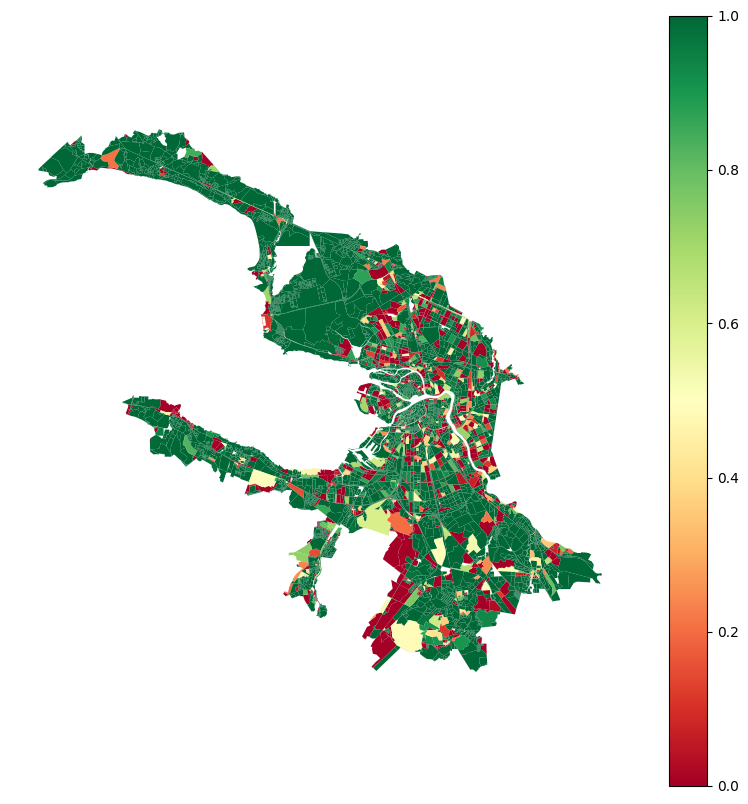

In [4]:
blocks_gdf[['geometry']].join(blocks_df).plot('collocation', vmin=0, vmax=1, cmap='RdYlGn', figsize=(10,10), legend=True).set_axis_off()